In [2]:
import sys
import os
script_dir = os.path.dirname(os.path.realpath('__file__'))
parent_dir = os.path.dirname(script_dir)
sys.path.insert(0, parent_dir)

import cnn_functions
import models
import pickle
from sklearn.model_selection import train_test_split
import torch
from torchvision import transforms
from torch.utils.data import Subset, DataLoader
from torch.utils.tensorboard import SummaryWriter

# Multiclass output

In [3]:
# Use the GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

labels_map = {
    0: "REAL Truck",
    1: "REAL Car",
    2: "REAL Bird",
    3: "REAL Cat",
    4: "REAL Deer",
    5: "REAL Dog",
    6: "REAL Frog",
    7: "REAL Horse",
    8: "REAL Ship",
    9: "REAL Plane",
    10: "FAKE Truck",
    11: "FAKE Car",
    12: "FAKE Bird",
    13: "FAKE Cat",
    14: "FAKE Deer",
    15: "FAKE Dog",
    16: "FAKE Frog",
    17: "FAKE Horse",
    18: "FAKE Ship",
    19: "FAKE Plane"
}

# Compose the transform that will be applied to the data
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor()
])

# 100k samples for training
train_ds = cnn_functions.MulticlassCIFAKE(img_dir=os.path.join(script_dir, '../../dataset/train'), transform=transform)

# 10k samples for validation and 10k samples for testing
val_test_ds= cnn_functions.MulticlassCIFAKE(img_dir=os.path.join(script_dir, '../../dataset/test'), transform=transform)
idx_val, idx_test = train_test_split(
    range(len(val_test_ds)),
    test_size=0.5,  # 50-50 split
    stratify=val_test_ds.img_labels, # Uniform class distribution
    random_state=0
)
validation_ds = Subset(val_test_ds, idx_val)
test_ds = Subset(val_test_ds, idx_test)

cuda


# Feature extraction

/home/scardovi/ai-generated-image-detection/detection/lib/python3.10/site-packages/torch/cuda/__init__.py:123: UserWarning: 
    Found GPU1 NVIDIA GeForce GT 710 which is of cuda capability 3.5.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability supported by this library is 3.7.
    
  warnings.warn(old_gpu_warn % (d, name, major, minor, min_arch // 10, min_arch % 10))




 - multiclass_feature_extraction_linear_lr1e-02_batch32
Epoch 1; Train err = 66.09%; Val err = 66.41%; Loss: 2.8826
Epoch 2; Train err = 65.34%; Val err = 65.51%; Loss: 2.8870
Epoch 3; Train err = 64.38%; Val err = 65.11%; Loss: 2.9102
Epoch 4; Train err = 64.65%; Val err = 64.86%; Loss: 2.8978
Epoch 5; Train err = 65.26%; Val err = 65.99%; Loss: 2.9168
Epoch 10; Train err = 64.32%; Val err = 64.83%; Loss: 2.8919
Epoch 15; Train err = 66.04%; Val err = 66.59%; Loss: 2.8837
Epoch 20; Train err = 65.09%; Val err = 66.05%; Loss: 2.8843
Epoch 25; Train err = 65.50%; Val err = 66.21%; Loss: 2.9090
Epoch 29; Train err = 63.48%; Val err = 64.32%; Loss: 2.9060
Stopping training...


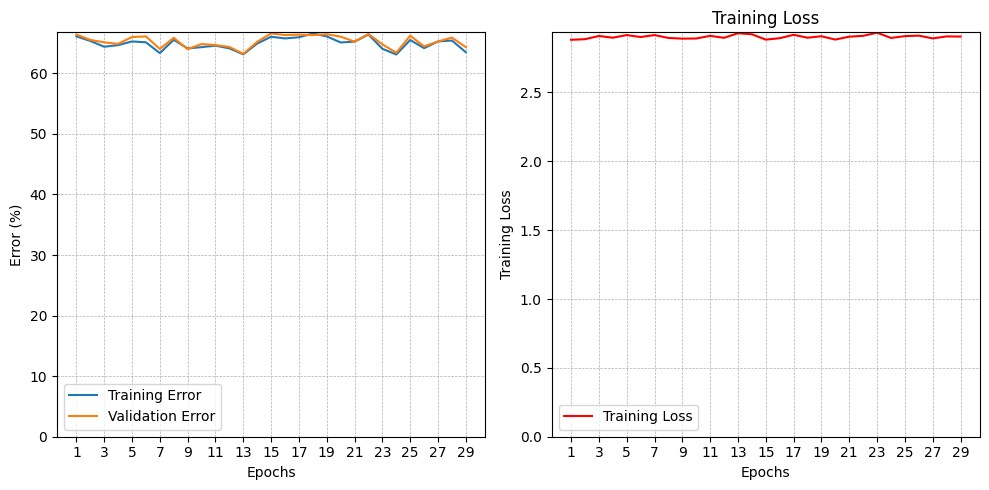



 - multiclass_feature_extraction_linear_lr1e-02_batch512
Epoch 1; Train err = 57.27%; Val err = 58.27%; Loss: 2.1059
Epoch 2; Train err = 54.94%; Val err = 56.29%; Loss: 1.8344
Epoch 3; Train err = 54.29%; Val err = 56.18%; Loss: 1.7876
Epoch 4; Train err = 53.71%; Val err = 55.41%; Loss: 1.7675
Epoch 5; Train err = 53.64%; Val err = 55.45%; Loss: 1.7504
Epoch 10; Train err = 52.58%; Val err = 54.39%; Loss: 1.7280
Epoch 15; Train err = 52.70%; Val err = 54.98%; Loss: 1.7208
Epoch 20; Train err = 53.25%; Val err = 55.31%; Loss: 1.7158
Epoch 22; Train err = 52.70%; Val err = 55.04%; Loss: 1.7167
Stopping training...


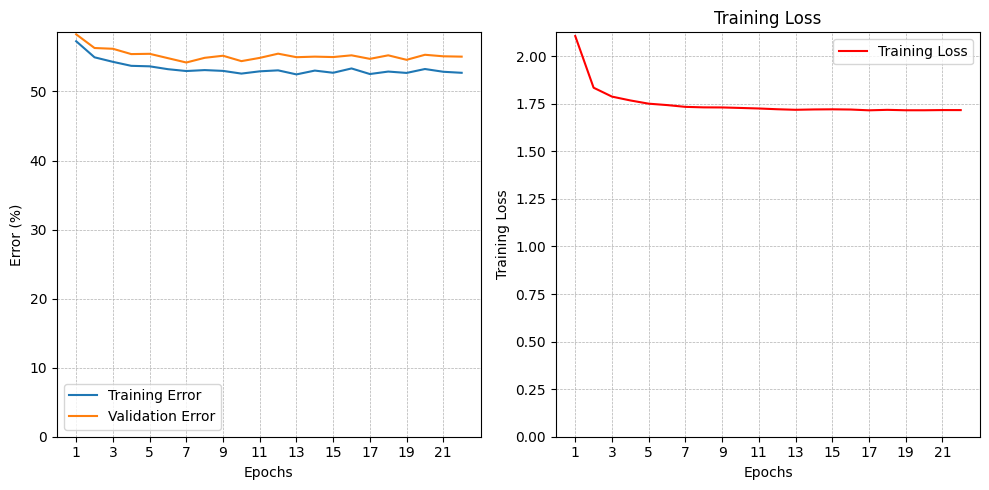



 - multiclass_feature_extraction_linear_lr1e-02_batch1024
Epoch 1; Train err = 58.98%; Val err = 59.50%; Loss: 2.2600
Epoch 2; Train err = 56.50%; Val err = 57.54%; Loss: 1.8887
Epoch 3; Train err = 55.23%; Val err = 56.26%; Loss: 1.8206
Epoch 4; Train err = 54.41%; Val err = 56.02%; Loss: 1.7877
Epoch 5; Train err = 53.97%; Val err = 55.81%; Loss: 1.7647
Epoch 10; Train err = 52.83%; Val err = 54.33%; Loss: 1.7165
Epoch 15; Train err = 52.39%; Val err = 54.54%; Loss: 1.7025
Epoch 20; Train err = 52.33%; Val err = 54.38%; Loss: 1.6941
Epoch 22; Train err = 52.56%; Val err = 54.59%; Loss: 1.6897
Stopping training...


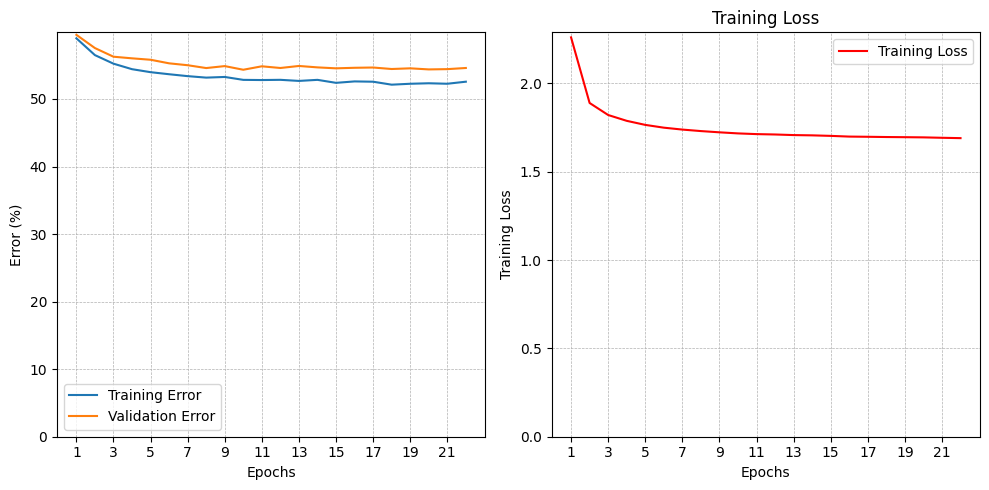



 - multiclass_feature_extraction_linear_lr1e-03_batch32
Epoch 1; Train err = 57.37%; Val err = 57.30%; Loss: 2.0670
Epoch 2; Train err = 56.70%; Val err = 57.69%; Loss: 1.9033
Epoch 3; Train err = 55.68%; Val err = 56.15%; Loss: 1.8835
Epoch 4; Train err = 55.82%; Val err = 56.52%; Loss: 1.8724
Epoch 5; Train err = 54.72%; Val err = 55.02%; Loss: 1.8637
Epoch 10; Train err = 54.67%; Val err = 55.48%; Loss: 1.8583
Epoch 15; Train err = 55.27%; Val err = 55.91%; Loss: 1.8598
Epoch 20; Train err = 54.63%; Val err = 55.53%; Loss: 1.8627
Epoch 25; Train err = 55.17%; Val err = 55.60%; Loss: 1.8630
Epoch 26; Train err = 55.42%; Val err = 56.10%; Loss: 1.8615
Stopping training...


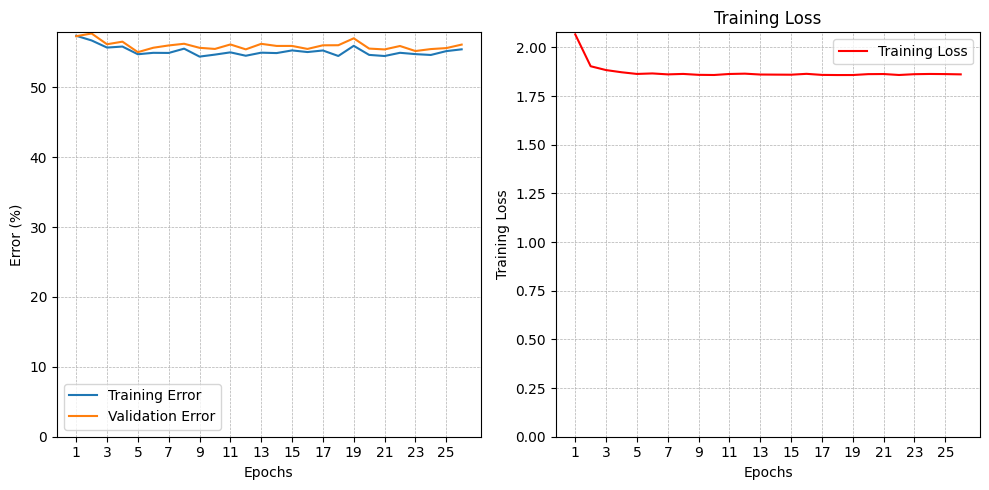



 - multiclass_feature_extraction_linear_lr1e-03_batch512
Epoch 1; Train err = 69.20%; Val err = 69.44%; Loss: 2.6672
Epoch 2; Train err = 63.35%; Val err = 63.81%; Loss: 2.2139
Epoch 3; Train err = 60.93%; Val err = 61.27%; Loss: 2.0712
Epoch 4; Train err = 59.43%; Val err = 59.95%; Loss: 1.9969
Epoch 5; Train err = 58.24%; Val err = 59.04%; Loss: 1.9485
Epoch 10; Train err = 55.85%; Val err = 56.81%; Loss: 1.8330
Epoch 15; Train err = 54.70%; Val err = 55.98%; Loss: 1.7867
Epoch 20; Train err = 54.22%; Val err = 55.69%; Loss: 1.7579
Epoch 22; Train err = 53.91%; Val err = 55.55%; Loss: 1.7525
Stopping training...


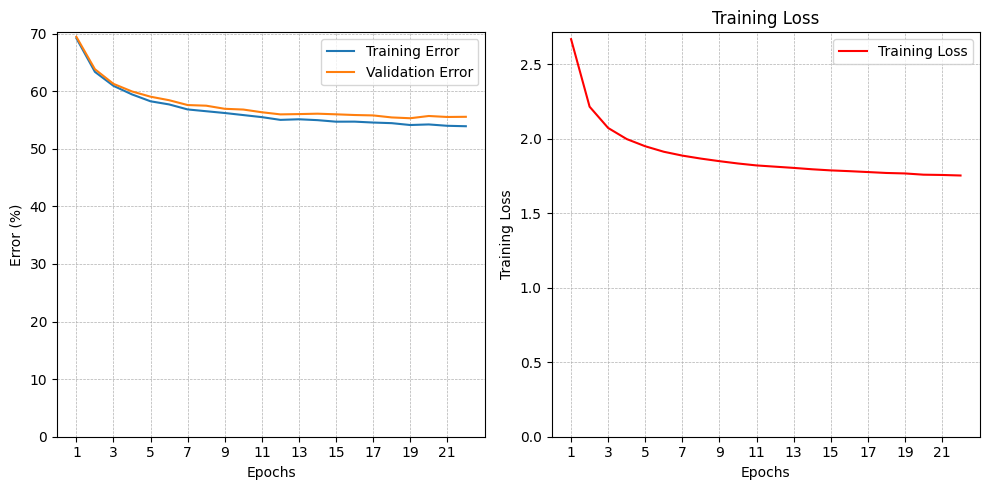



 - multiclass_feature_extraction_linear_lr1e-03_batch1024
Epoch 1; Train err = 76.87%; Val err = 77.19%; Loss: 2.8691
Epoch 2; Train err = 69.17%; Val err = 69.27%; Loss: 2.4404
Epoch 3; Train err = 65.45%; Val err = 66.07%; Loss: 2.2620
Epoch 4; Train err = 63.07%; Val err = 64.13%; Loss: 2.1604
Epoch 5; Train err = 61.74%; Val err = 62.51%; Loss: 2.0915
Epoch 10; Train err = 58.10%; Val err = 59.21%; Loss: 1.9310
Epoch 15; Train err = 56.59%; Val err = 58.02%; Loss: 1.8631
Epoch 20; Train err = 55.71%; Val err = 57.18%; Loss: 1.8249
Epoch 22; Train err = 55.47%; Val err = 57.02%; Loss: 1.8128
Stopping training...


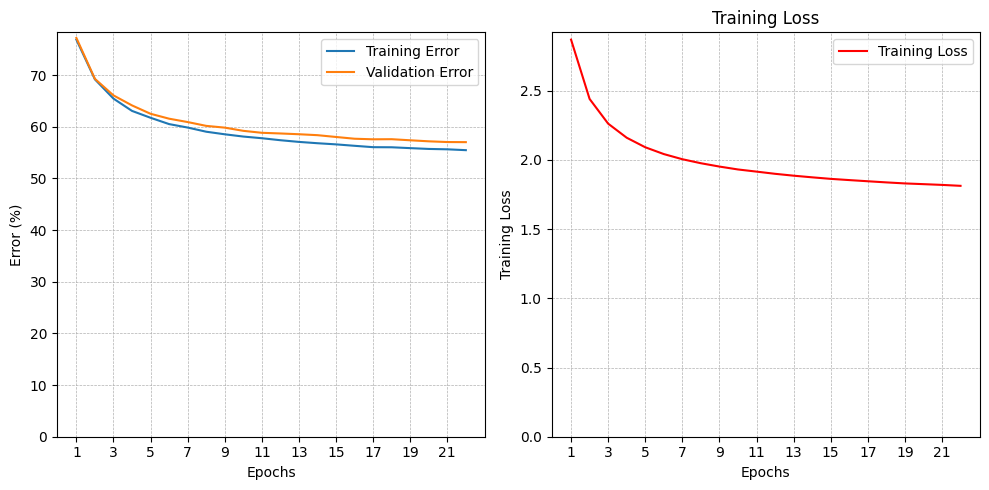



 - multiclass_feature_extraction_linear_lr1e-04_batch32
Epoch 1; Train err = 65.82%; Val err = 65.77%; Loss: 2.5045
Epoch 2; Train err = 60.97%; Val err = 61.50%; Loss: 2.1129
Epoch 3; Train err = 58.77%; Val err = 59.41%; Loss: 2.0120
Epoch 4; Train err = 58.27%; Val err = 59.39%; Loss: 1.9591
Epoch 5; Train err = 57.40%; Val err = 58.07%; Loss: 1.9266
Epoch 10; Train err = 55.35%; Val err = 55.85%; Loss: 1.8589
Epoch 15; Train err = 54.62%; Val err = 55.42%; Loss: 1.8347
Epoch 20; Train err = 54.59%; Val err = 55.02%; Loss: 1.8252
Epoch 24; Train err = 54.11%; Val err = 55.02%; Loss: 1.8129
Stopping training...


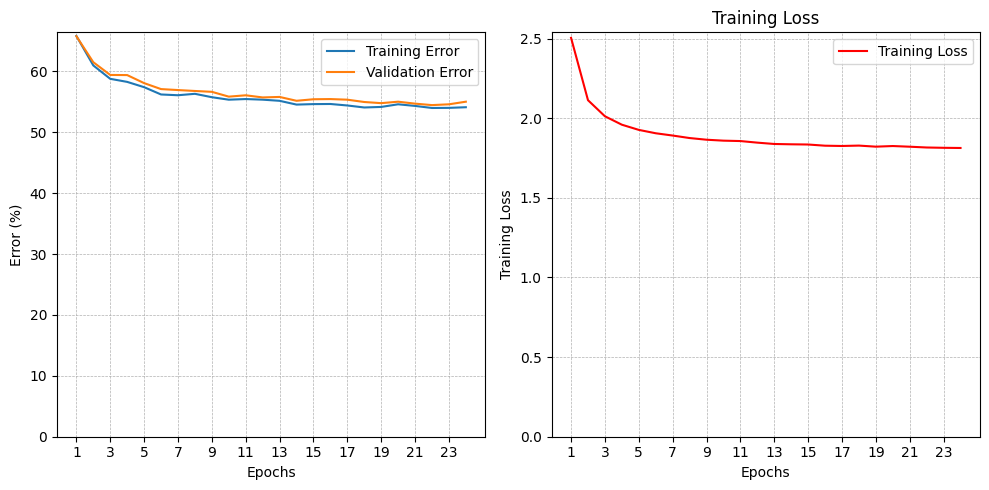



 - multiclass_feature_extraction_linear_lr1e-04_batch512
Epoch 1; Train err = 91.62%; Val err = 91.75%; Loss: 3.1551
Epoch 2; Train err = 86.81%; Val err = 86.78%; Loss: 2.9497
Epoch 3; Train err = 82.04%; Val err = 82.05%; Loss: 2.8035
Epoch 4; Train err = 78.69%; Val err = 78.80%; Loss: 2.6900
Epoch 5; Train err = 75.80%; Val err = 75.85%; Loss: 2.5998
Epoch 10; Train err = 68.34%; Val err = 68.23%; Loss: 2.3364
Epoch 15; Train err = 65.02%; Val err = 64.69%; Loss: 2.2035
Epoch 20; Train err = 62.96%; Val err = 63.16%; Loss: 2.1211
Epoch 25; Train err = 61.52%; Val err = 61.65%; Loss: 2.0642
Epoch 30; Train err = 60.45%; Val err = 60.62%; Loss: 2.0207
Epoch 35; Train err = 59.67%; Val err = 59.96%; Loss: 1.9875
Epoch 36; Train err = 59.53%; Val err = 59.74%; Loss: 1.9847
Stopping training...


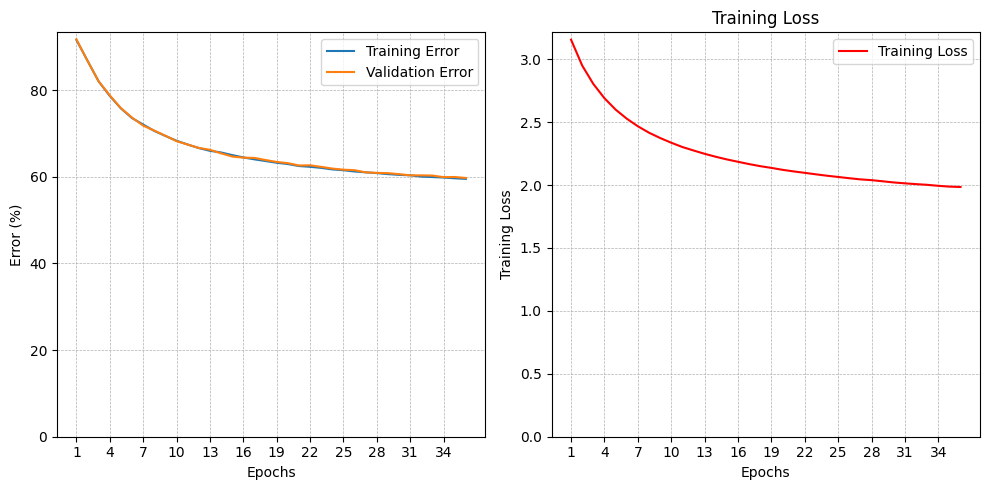



 - multiclass_feature_extraction_linear_lr1e-04_batch1024
Epoch 1; Train err = 93.89%; Val err = 93.66%; Loss: 3.1913
Epoch 2; Train err = 91.83%; Val err = 91.72%; Loss: 3.0724
Epoch 3; Train err = 89.28%; Val err = 89.01%; Loss: 2.9813
Epoch 4; Train err = 86.54%; Val err = 86.41%; Loss: 2.9007
Epoch 5; Train err = 84.15%; Val err = 83.86%; Loss: 2.8298
Epoch 10; Train err = 76.03%; Val err = 75.55%; Loss: 2.5814
Epoch 15; Train err = 71.56%; Val err = 70.80%; Loss: 2.4328
Epoch 20; Train err = 68.72%; Val err = 68.27%; Loss: 2.3336
Epoch 25; Train err = 66.75%; Val err = 66.70%; Loss: 2.2615
Epoch 30; Train err = 65.28%; Val err = 65.26%; Loss: 2.2055
Epoch 35; Train err = 64.13%; Val err = 64.30%; Loss: 2.1612
Epoch 39; Train err = 63.42%; Val err = 63.75%; Loss: 2.1333
Stopping training...


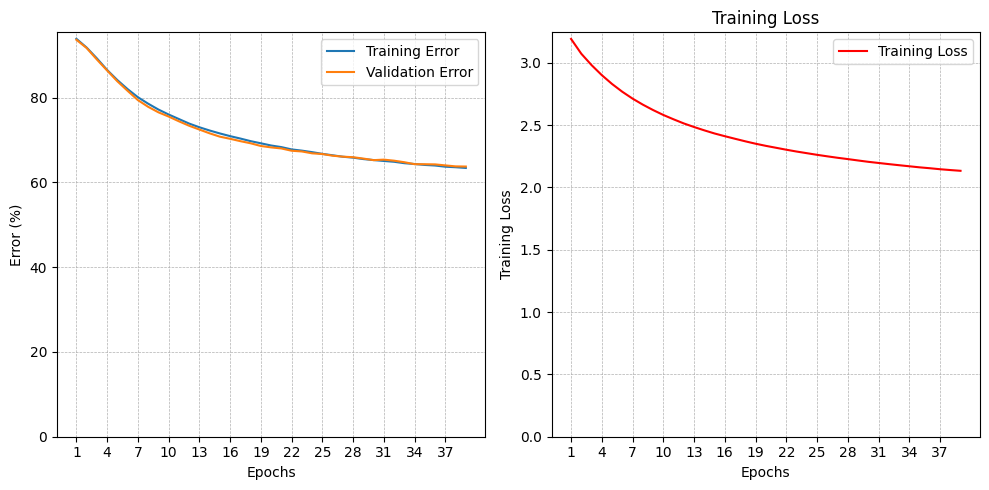

In [3]:
model_init_function = models.multiclass_feature_extraction_linear
epochs = 50
learning_rates = [0.01, 0.001, 0.0001]
batch_sizes = [32, 512, 1024]

min_epochs = 15
stopping_patience = 5
val_batch_size = 1000
val_dl = DataLoader(validation_ds, batch_size=val_batch_size, num_workers=6, prefetch_factor=6, pin_memory=True)

for lr in learning_rates:
    for batch_size in batch_sizes:
        train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=6, prefetch_factor=6, pin_memory=True)

        # Initialize the model
        model = model_init_function()
        model = model.to(device)
        model_name = f"{model_init_function.__name__}_lr{lr:.0e}_batch{batch_size}"
        print("\n\n - " + model_name)
        writer = SummaryWriter('logs/'+model_name)

        # Train the model
        train_err, val_err, train_loss = cnn_functions.train_network(model, device, lr, epochs, train_dl, val_dl, writer=writer, min_epochs=min_epochs, stopping_patience=stopping_patience)
        cnn_functions.plot_training_stats(train_err, val_err, train_loss)
        model_name += f"_epochs{len(train_err)}"
        writer.close()
        
        # Save the progress
        torch.save(model.state_dict(), './weights/' + model_name + '.pth')
        stats_dict = {
            'train_err': train_err,
            'val_err': val_err,
            'train_loss': train_loss
        }
        with open('./stats/' + model_name + '.pkl', 'wb') as f:
            pickle.dump(stats_dict, f)

# Fine tuning



 - multiclass_finetuning_lr1e-03_batch32
Epoch 1; Train err = 18.00%; Val err = 21.39%; Loss: 0.9368
Epoch 2; Train err = 11.49%; Val err = 16.50%; Loss: 0.5759
Epoch 3; Train err = 8.90%; Val err = 15.31%; Loss: 0.4577
Epoch 4; Train err = 7.29%; Val err = 15.29%; Loss: 0.3818
Epoch 5; Train err = 5.65%; Val err = 14.18%; Loss: 0.3236
Epoch 10; Train err = 1.74%; Val err = 13.81%; Loss: 0.1561
Epoch 15; Train err = 0.84%; Val err = 13.93%; Loss: 0.0943
Epoch 20; Train err = 0.57%; Val err = 13.89%; Loss: 0.0578
Epoch 25; Train err = 0.16%; Val err = 13.26%; Loss: 0.0407
Epoch 30; Train err = 0.24%; Val err = 13.28%; Loss: 0.0323
Epoch 31; Train err = 0.14%; Val err = 13.19%; Loss: 0.0312
Stopping training...


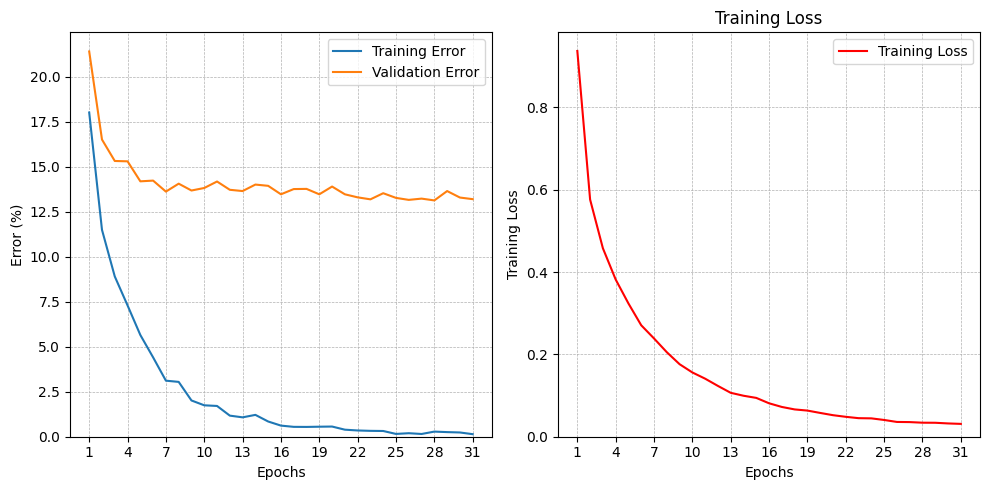



 - multiclass_finetuning_lr1e-03_batch512
Epoch 1; Train err = 32.95%; Val err = 34.67%; Loss: 1.6622
Epoch 2; Train err = 23.98%; Val err = 27.25%; Loss: 0.8833
Epoch 3; Train err = 19.90%; Val err = 24.48%; Loss: 0.6965
Epoch 4; Train err = 16.75%; Val err = 22.38%; Loss: 0.5898
Epoch 5; Train err = 14.47%; Val err = 21.51%; Loss: 0.5138
Epoch 10; Train err = 6.06%; Val err = 19.37%; Loss: 0.2707
Epoch 15; Train err = 1.21%; Val err = 19.41%; Loss: 0.1188
Epoch 20; Train err = 0.11%; Val err = 19.45%; Loss: 0.0420
Epoch 22; Train err = 0.04%; Val err = 19.00%; Loss: 0.0299
Stopping training...


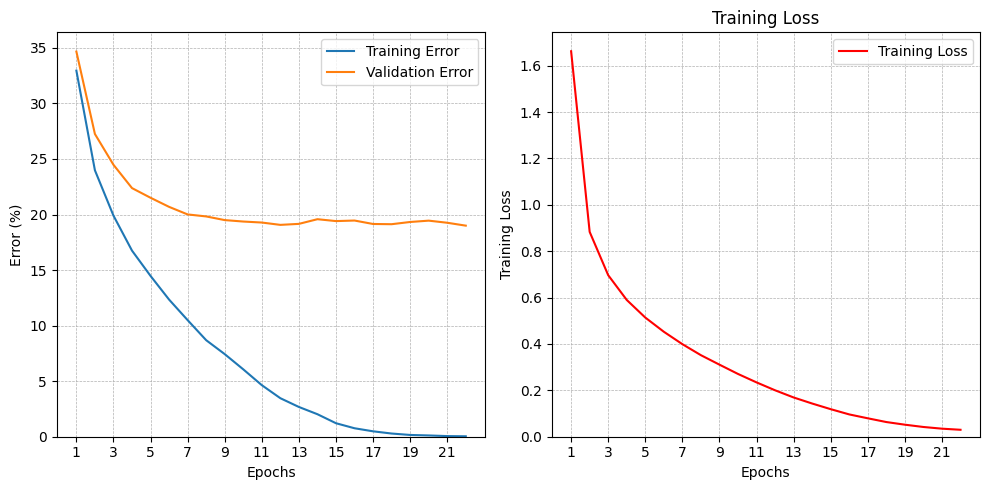



 - multiclass_finetuning_lr1e-03_batch1024
Epoch 1; Train err = 44.04%; Val err = 44.89%; Loss: 2.1146
Epoch 2; Train err = 32.47%; Val err = 34.58%; Loss: 1.1808
Epoch 3; Train err = 27.22%; Val err = 30.26%; Loss: 0.9228
Epoch 4; Train err = 23.82%; Val err = 27.48%; Loss: 0.7877
Epoch 5; Train err = 21.33%; Val err = 25.58%; Loss: 0.6983
Epoch 10; Train err = 13.65%; Val err = 21.74%; Loss: 0.4579
Epoch 15; Train err = 8.33%; Val err = 20.08%; Loss: 0.3161
Epoch 20; Train err = 4.45%; Val err = 20.28%; Loss: 0.2050
Epoch 22; Train err = 3.02%; Val err = 19.94%; Loss: 0.1666
Stopping training...


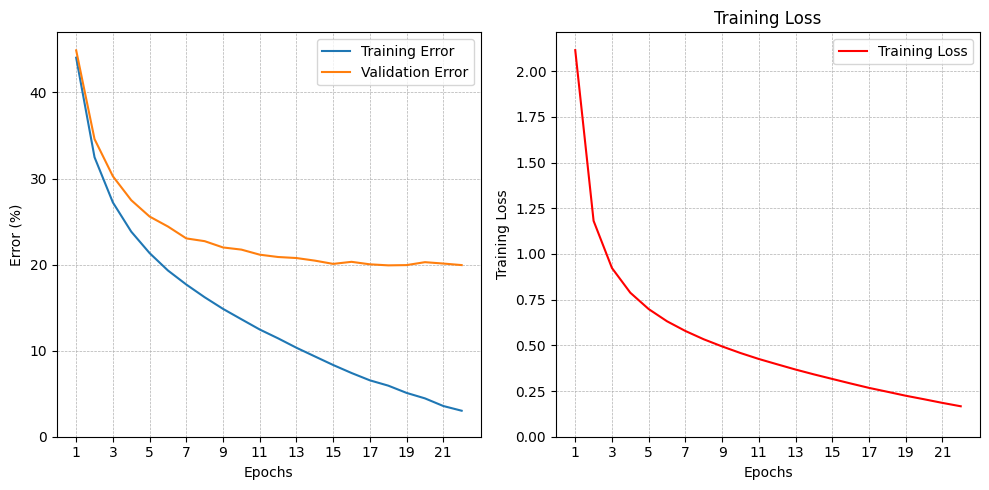



 - multiclass_finetuning_lr1e-04_batch32
Epoch 1; Train err = 28.35%; Val err = 30.08%; Loss: 1.4607
Epoch 2; Train err = 21.40%; Val err = 24.40%; Loss: 0.9113
Epoch 3; Train err = 18.16%; Val err = 21.86%; Loss: 0.7668
Epoch 4; Train err = 15.74%; Val err = 20.31%; Loss: 0.6829
Epoch 5; Train err = 14.25%; Val err = 19.22%; Loss: 0.6156
Epoch 10; Train err = 8.03%; Val err = 16.09%; Loss: 0.4281
Epoch 15; Train err = 4.42%; Val err = 15.45%; Loss: 0.3185
Epoch 20; Train err = 1.92%; Val err = 14.86%; Loss: 0.2306
Epoch 25; Train err = 0.74%; Val err = 14.82%; Loss: 0.1683
Epoch 25; Train err = 0.74%; Val err = 14.82%; Loss: 0.1683
Stopping training...


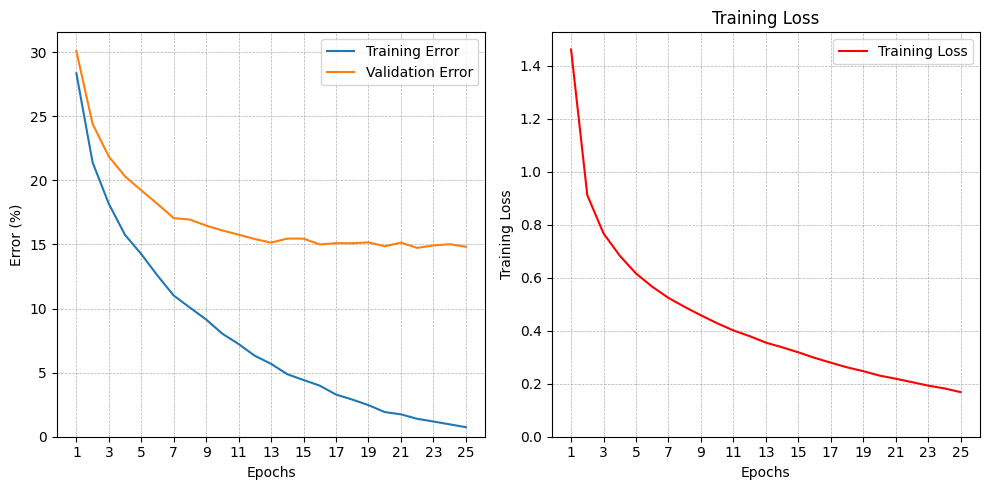



 - multiclass_finetuning_lr1e-04_batch512
Epoch 1; Train err = 70.52%; Val err = 70.83%; Loss: 2.7844
Epoch 2; Train err = 57.84%; Val err = 58.31%; Loss: 2.1605
Epoch 3; Train err = 50.30%; Val err = 51.35%; Loss: 1.7962
Epoch 4; Train err = 45.48%; Val err = 46.58%; Loss: 1.5541
Epoch 5; Train err = 41.82%; Val err = 43.37%; Loss: 1.3888
Epoch 10; Train err = 31.55%; Val err = 34.21%; Loss: 0.9965
Epoch 15; Train err = 26.34%; Val err = 29.88%; Loss: 0.8271
Epoch 20; Train err = 23.14%; Val err = 27.45%; Loss: 0.7232
Epoch 25; Train err = 20.76%; Val err = 25.57%; Loss: 0.6495
Epoch 30; Train err = 18.76%; Val err = 24.19%; Loss: 0.5921
Epoch 35; Train err = 17.15%; Val err = 23.25%; Loss: 0.5425
Epoch 40; Train err = 15.72%; Val err = 22.91%; Loss: 0.5026
Epoch 45; Train err = 14.37%; Val err = 22.28%; Loss: 0.4659
Epoch 50; Train err = 13.03%; Val err = 21.77%; Loss: 0.4312


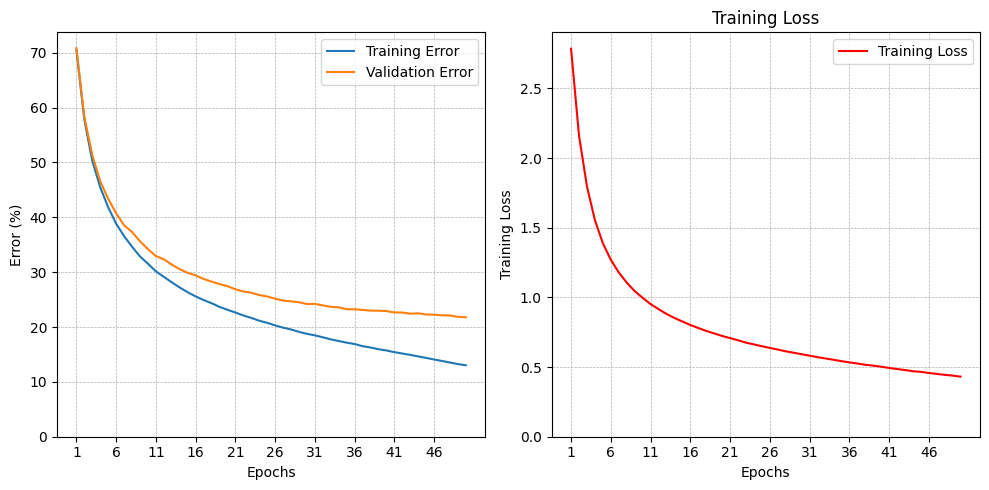



 - multiclass_finetuning_lr1e-04_batch1024
Epoch 1; Train err = 82.80%; Val err = 83.04%; Loss: 3.0441
Epoch 2; Train err = 70.62%; Val err = 71.06%; Loss: 2.5777
Epoch 3; Train err = 62.98%; Val err = 63.20%; Loss: 2.2822
Epoch 4; Train err = 57.64%; Val err = 58.10%; Loss: 2.0508
Epoch 5; Train err = 53.35%; Val err = 54.00%; Loss: 1.8631
Epoch 10; Train err = 41.24%; Val err = 42.86%; Loss: 1.3353
Epoch 15; Train err = 35.14%; Val err = 36.91%; Loss: 1.1046
Epoch 20; Train err = 31.22%; Val err = 33.81%; Loss: 0.9696
Epoch 25; Train err = 28.27%; Val err = 31.31%; Loss: 0.8749
Epoch 30; Train err = 26.07%; Val err = 29.35%; Loss: 0.8046
Epoch 35; Train err = 24.29%; Val err = 27.92%; Loss: 0.7482
Epoch 40; Train err = 22.78%; Val err = 27.04%; Loss: 0.7040
Epoch 45; Train err = 21.48%; Val err = 26.14%; Loss: 0.6634
Epoch 50; Train err = 20.38%; Val err = 25.48%; Loss: 0.6293


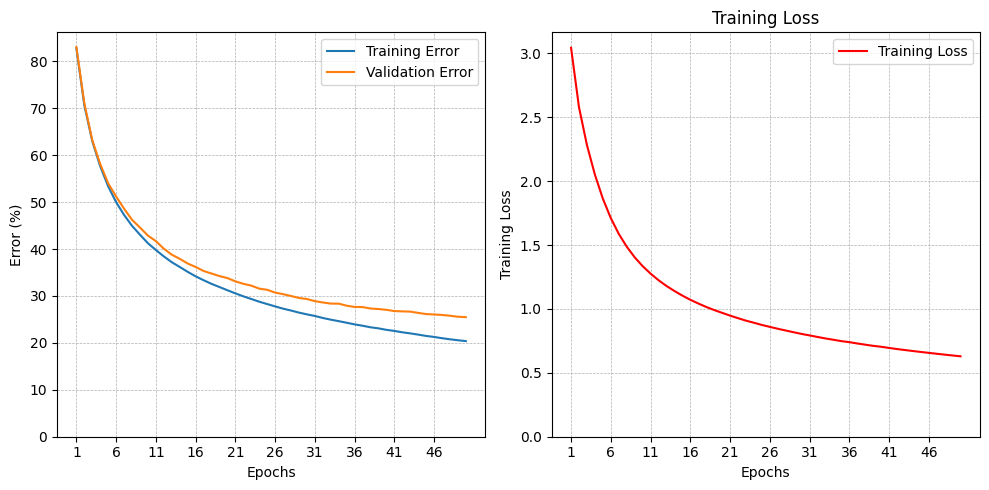

In [4]:
model_init_function = models.multiclass_finetuning
epochs = 50
learning_rates = [0.001, 0.0001]
batch_sizes = [32, 512, 1024]

min_epochs = 15
stopping_patience = 5
val_batch_size = 1000
val_dl = DataLoader(validation_ds, batch_size=val_batch_size, num_workers=6, prefetch_factor=6, pin_memory=True)

for lr in learning_rates:
    for batch_size in batch_sizes:
        train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=6, prefetch_factor=6, pin_memory=True)

        # Initialize the model
        model = model_init_function()
        model = model.to(device)
        model_name = f"{model_init_function.__name__}_lr{lr:.0e}_batch{batch_size}"
        print("\n\n - " + model_name)
        writer = SummaryWriter('logs/'+model_name)

        # Train the model
        train_err, val_err, train_loss = cnn_functions.train_network(model, device, lr, epochs, train_dl, val_dl, writer=writer, min_epochs=min_epochs, stopping_patience=stopping_patience)
        cnn_functions.plot_training_stats(train_err, val_err, train_loss)
        model_name += f"_epochs{len(train_err)}"
        writer.close()
        
        # Save the progress
        torch.save(model.state_dict(), './weights/' + model_name + '.pth')
        stats_dict = {
            'train_err': train_err,
            'val_err': val_err,
            'train_loss': train_loss
        }
        with open('./stats/' + model_name + '.pkl', 'wb') as f:
            pickle.dump(stats_dict, f)

## Finetuning with dropout layer

/home/scardovi/ai-generated-image-detection/detection/lib/python3.10/site-packages/torch/cuda/__init__.py:123: UserWarning: 
    Found GPU1 NVIDIA GeForce GT 710 which is of cuda capability 3.5.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability supported by this library is 3.7.
    
  warnings.warn(old_gpu_warn % (d, name, major, minor, min_arch // 10, min_arch % 10))




 - multiclass_finetuning_1hidden_lr1e-03_batch32
Epoch 1; Train err = 17.73%; Val err = 20.21%; Loss: 1.1332
Epoch 2; Train err = 12.80%; Val err = 17.03%; Loss: 0.6964
Epoch 3; Train err = 11.81%; Val err = 16.69%; Loss: 0.5693
Epoch 4; Train err = 8.47%; Val err = 14.84%; Loss: 0.4822
Epoch 5; Train err = 7.26%; Val err = 14.30%; Loss: 0.4229
Epoch 10; Train err = 3.23%; Val err = 14.17%; Loss: 0.2347
Epoch 15; Train err = 1.68%; Val err = 13.92%; Loss: 0.1442
Epoch 16; Train err = 1.11%; Val err = 13.00%; Loss: 0.1330
Stopping training...


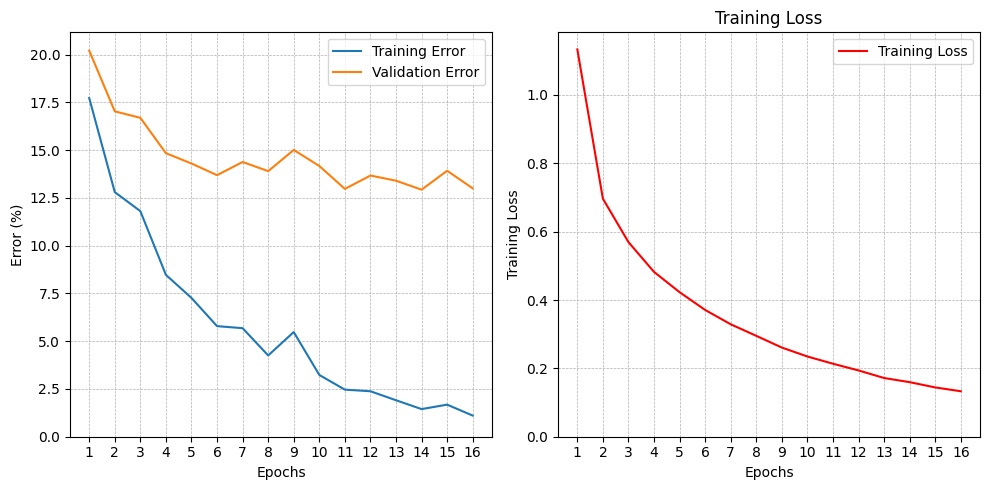



 - multiclass_finetuning_1hidden_lr1e-03_batch512
Epoch 1; Train err = 47.47%; Val err = 47.95%; Loss: 2.4950
Epoch 2; Train err = 32.02%; Val err = 34.04%; Loss: 1.4061
Epoch 3; Train err = 25.48%; Val err = 27.79%; Loss: 1.0156
Epoch 4; Train err = 21.47%; Val err = 24.47%; Loss: 0.8387
Epoch 5; Train err = 19.06%; Val err = 22.55%; Loss: 0.7285
Epoch 10; Train err = 10.91%; Val err = 18.37%; Loss: 0.4503
Epoch 15; Train err = 5.69%; Val err = 17.31%; Loss: 0.2844
Epoch 20; Train err = 2.47%; Val err = 17.33%; Loss: 0.1619
Epoch 20; Train err = 2.47%; Val err = 17.33%; Loss: 0.1619
Stopping training...


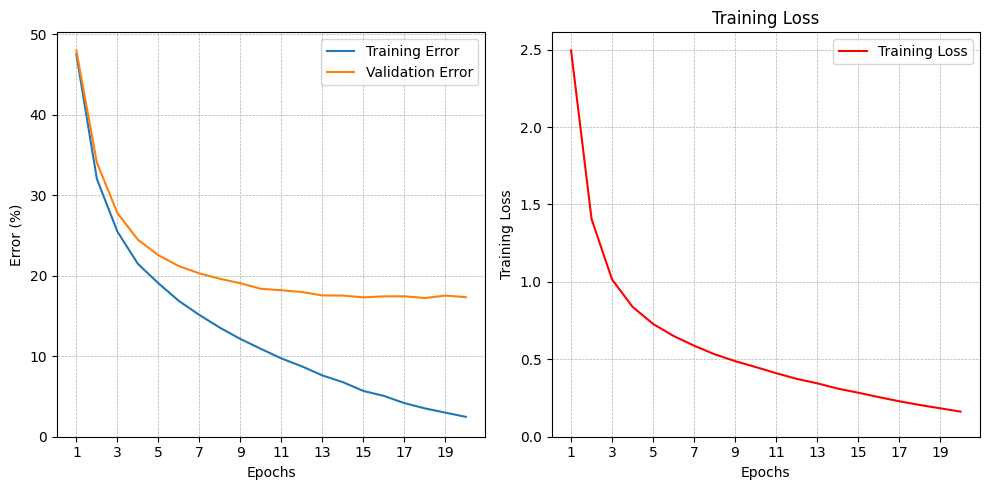

In [3]:
model_init_function = models.multiclass_finetuning_1hidden
epochs = 50
lr = 0.001
batch_sizes = [32, 512]

min_epochs = 5
stopping_patience = 5
val_batch_size = 1000
val_dl = DataLoader(validation_ds, batch_size=val_batch_size, num_workers=6, prefetch_factor=6, pin_memory=True)

for batch_size in batch_sizes:
    train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=6, prefetch_factor=6, pin_memory=True)

    # Initialize the model
    model = model_init_function()
    model = model.to(device)
    model_name = f"{model_init_function.__name__}_lr{lr:.0e}_batch{batch_size}"
    print("\n\n - " + model_name)
    writer = SummaryWriter('logs/'+model_name)

    # Train the model
    train_err, val_err, train_loss = cnn_functions.train_network(model, device, lr, epochs, train_dl, val_dl, writer=writer, min_epochs=min_epochs, stopping_patience=stopping_patience)
    cnn_functions.plot_training_stats(train_err, val_err, train_loss)
    model_name += f"_epochs{len(train_err)}"
    writer.close()
    
    # Save the progress
    torch.save(model.state_dict(), './weights/' + model_name + '.pth')
    stats_dict = {
        'train_err': train_err,
        'val_err': val_err,
        'train_loss': train_loss
    }
    with open('./stats/' + model_name + '.pkl', 'wb') as f:
        pickle.dump(stats_dict, f)

## Two-step finetuning



 - multiclass_finetuning_1hidden_twostep_lr1e-02_batch32
Epoch 1; Train err = 62.36%; Val err = 62.65%; Loss: 2.3891
Epoch 2; Train err = 62.21%; Val err = 63.18%; Loss: 2.2818
Epoch 3; Train err = 60.80%; Val err = 61.61%; Loss: 2.2532
Epoch 4; Train err = 61.11%; Val err = 61.39%; Loss: 2.2444
Epoch 5; Train err = 59.92%; Val err = 60.95%; Loss: 2.2333
Epoch 10; Train err = 58.85%; Val err = 59.38%; Loss: 2.2030
Epoch 15; Train err = 57.63%; Val err = 58.81%; Loss: 2.1938
Epoch 17; Train err = 58.74%; Val err = 60.05%; Loss: 2.1887
Stopping training...


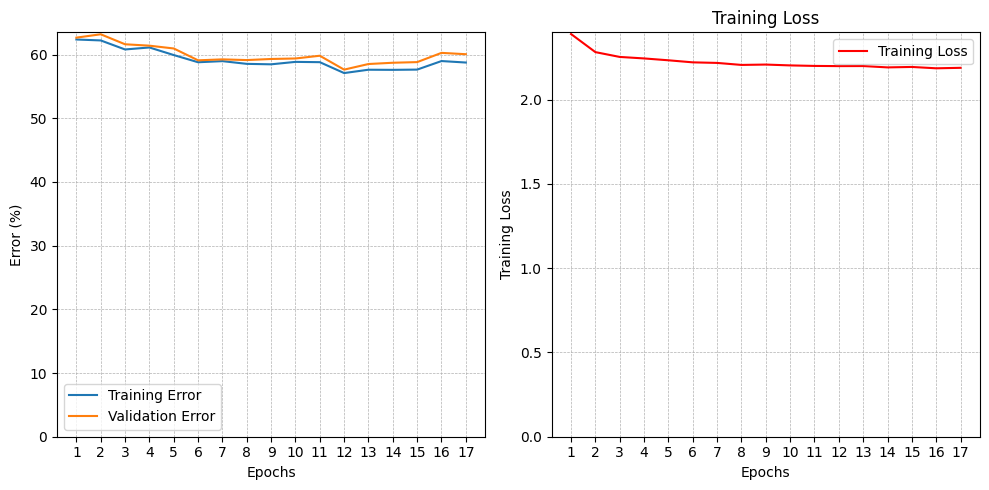

Resuming training: finetuning
Epoch 1; Train err = 29.14%; Val err = 30.54%; Loss: 1.5533
Epoch 2; Train err = 23.11%; Val err = 25.26%; Loss: 1.1200
Epoch 3; Train err = 20.01%; Val err = 22.91%; Loss: 0.9541
Epoch 4; Train err = 17.62%; Val err = 20.91%; Loss: 0.8545
Epoch 5; Train err = 16.12%; Val err = 20.01%; Loss: 0.7788
Epoch 10; Train err = 10.56%; Val err = 16.51%; Loss: 0.5625
Epoch 15; Train err = 7.21%; Val err = 15.21%; Loss: 0.4315
Epoch 20; Train err = 4.90%; Val err = 14.34%; Loss: 0.3472
Epoch 25; Train err = 3.30%; Val err = 13.65%; Loss: 0.2792
Epoch 30; Train err = 2.06%; Val err = 13.90%; Loss: 0.2234
Epoch 30; Train err = 2.06%; Val err = 13.90%; Loss: 0.2234
Stopping training...


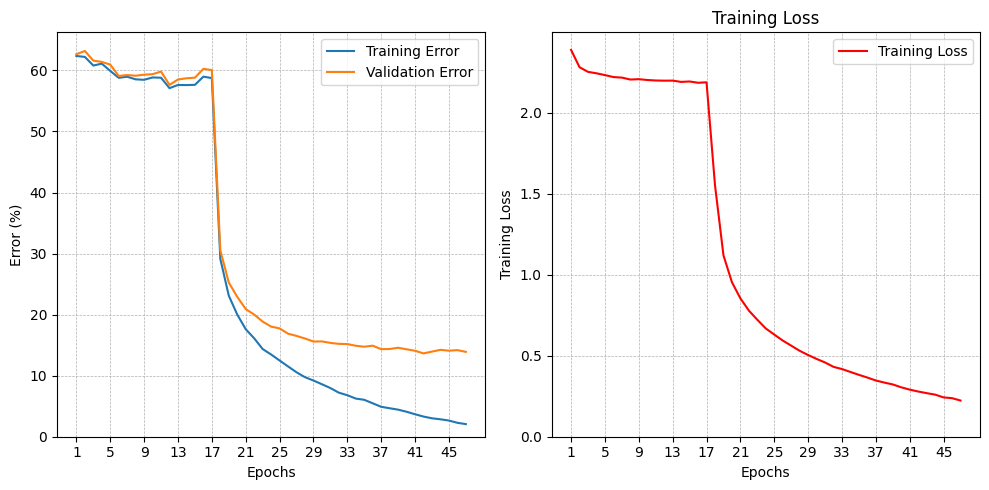

In [6]:
model_init_function = models.multiclass_finetuning_1hidden
epochs = 30
lr = 0.01
batch_size = 32

min_epochs = 5
stopping_patience = 5
val_batch_size = 1000
val_dl = DataLoader(validation_ds, batch_size=val_batch_size, num_workers=6, prefetch_factor=6, pin_memory=True)


train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=6, prefetch_factor=6, pin_memory=True)

# Initialize the model
model = model_init_function()
for param in model.parameters():
    param.requires_grad = False
for param in model.fc.parameters():
    param.requires_grad = True
model = model.to(device)
model_name = f"{model_init_function.__name__}_twostep_lr{lr:.0e}_batch{batch_size}"
print("\n\n - " + model_name)
writer = SummaryWriter('logs/'+model_name)

# Train the last two layers of the model
train_err, val_err, train_loss = cnn_functions.train_network(model, device, lr, epochs, train_dl, val_dl, writer=None, min_epochs=min_epochs, stopping_patience=stopping_patience)
cnn_functions.plot_training_stats(train_err, val_err, train_loss)

# Finetune the whole model
for param in model.parameters():
    param.requires_grad = True
lr = 0.0003
print("Resuming training: finetuning")
train_err1, val_err1, train_loss1 = cnn_functions.train_network(model, device, lr, epochs, train_dl, val_dl, writer=writer, min_epochs=min_epochs, stopping_patience=stopping_patience)
writer.close()

train_err += train_err1
val_err += val_err1
train_loss += train_loss1
cnn_functions.plot_training_stats(train_err, val_err, train_loss)
# Save the progress
torch.save(model.state_dict(), './weights/' + model_name + '.pth')
stats_dict = {
    'train_err': train_err,
    'val_err': val_err,
    'train_loss': train_loss
}
with open('./stats/' + model_name + '.pkl', 'wb') as f:
    pickle.dump(stats_dict, f)

# Confusion matrix

In [7]:
model_init_function = models.multiclass_finetuning_1hidden
weights_filename = 'multiclass_finetuning_1hidden_lr1e-03_batch32_epochs16.pth'

# Load the model and the test data
model = model_init_function()
model.load_state_dict(torch.load(os.path.join(script_dir, './weights', weights_filename)))
test_batch_size = 1000
test_loader = DataLoader(test_ds, batch_size=test_batch_size, shuffle=True)

Test accuracy: 86.57%


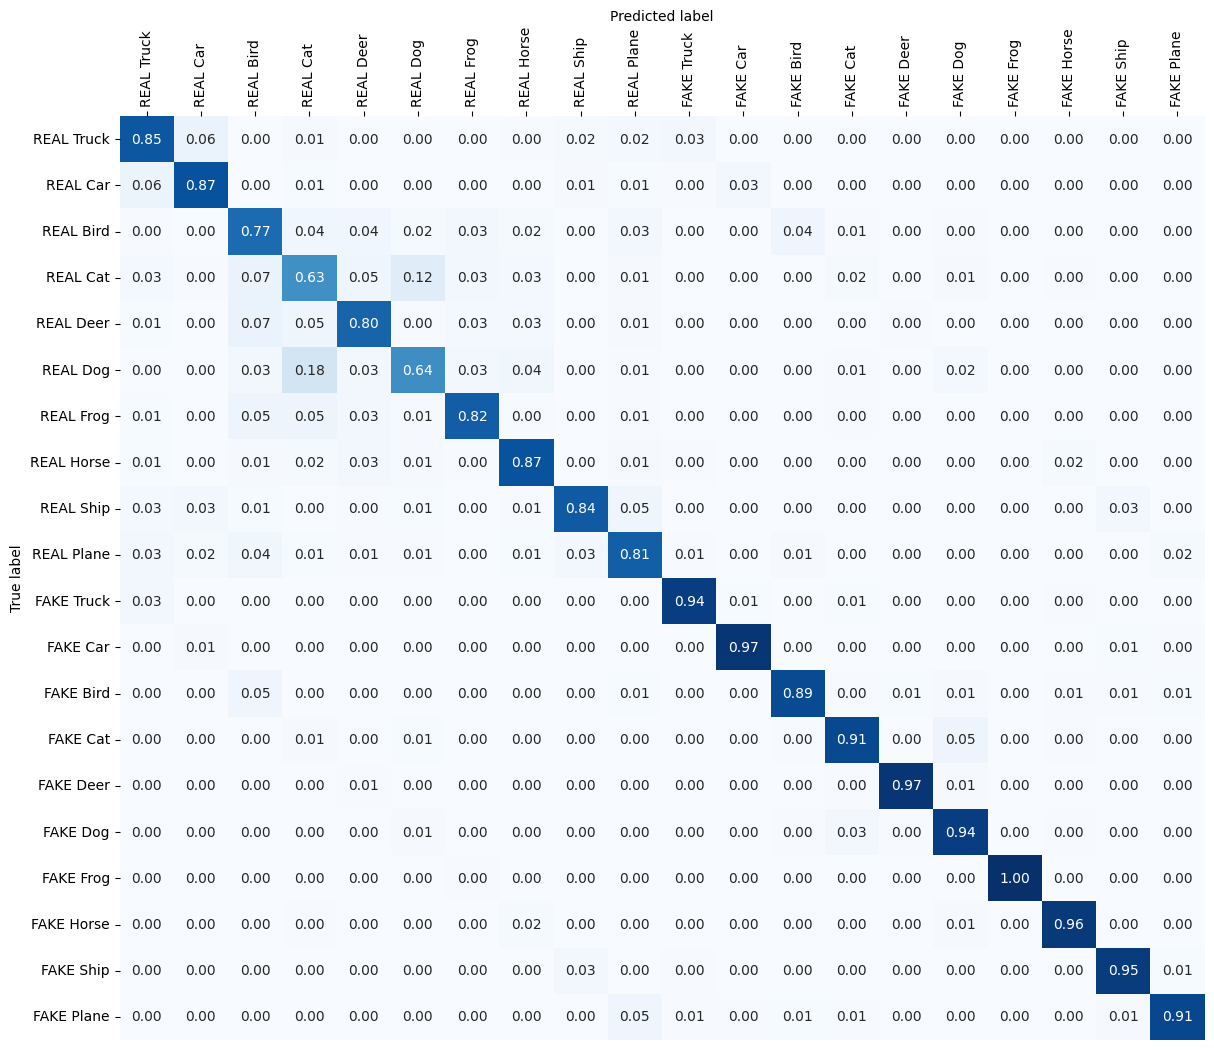

In [8]:
class_names = [labels_map[c] for c in labels_map]
cm_figsize = (14, 12)

# Plot the confusion matrix
confusion_matrix, test_accuracy = cnn_functions.make_confusion_matrix(device, model, test_loader, len(class_names))
print(f'Test accuracy: {test_accuracy*100:.2f}%')
cnn_functions.plot_confusion_matrix(confusion_matrix, class_names, cm_figsize)

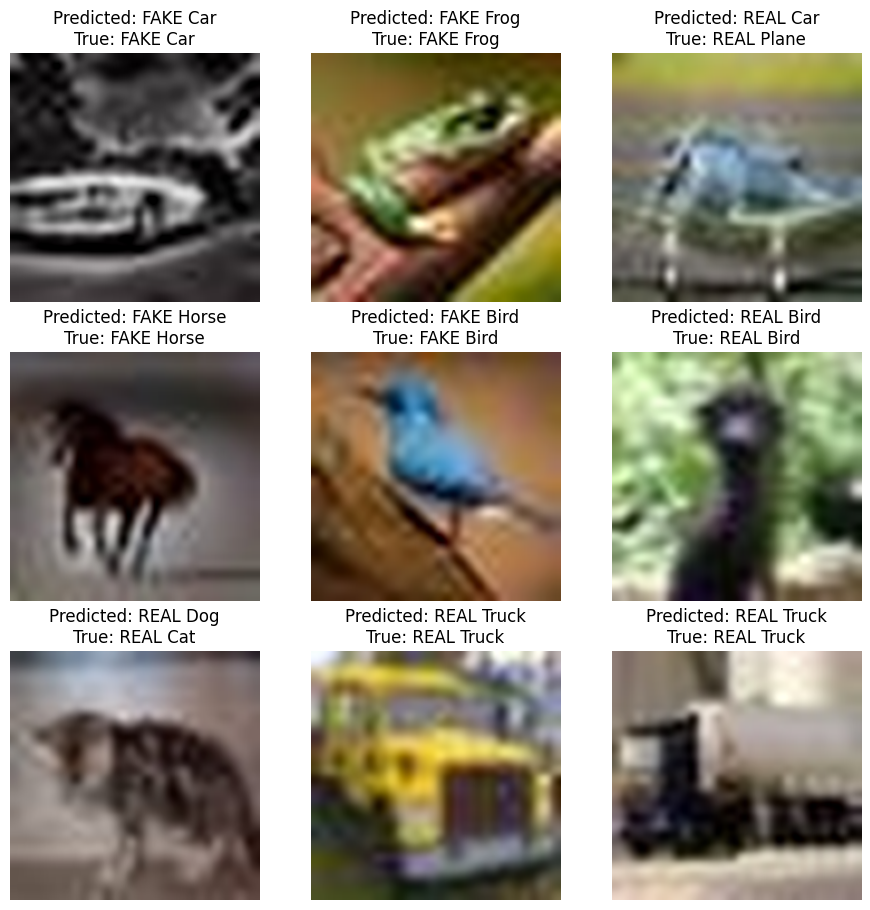

In [11]:
# Visualise some random examples of predictions 
cnn_functions.visualise_samples(model, test_ds, labels_map)